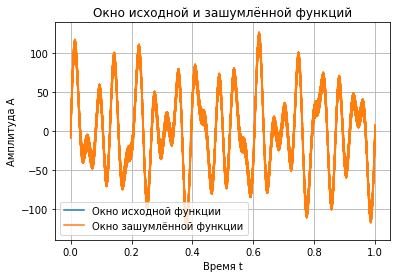

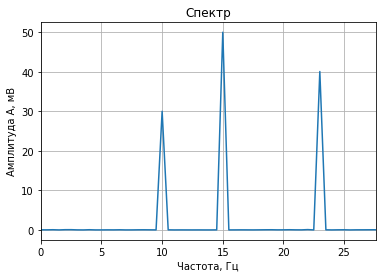

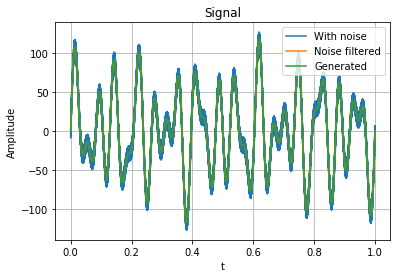

In [10]:
import matplotlib.pyplot as plt 
import numpy as np
from numpy.fft import rfft, rfftfreq
from numpy.random import uniform 
import scipy as sp
import scipy.fftpack
from scipy.integrate import quad

a1 = float(10)
b1 = float(23)
c1 = float(15)
dt = 0.00001
n = np.arange(0.0, 1.0, dt)
m = np.arange(0.0, 1.0, dt)

#функции для гармоник
def f(t):
    return float(30*np.sin(a1*2*np.pi*t) + 40*np.sin(b1*2*np.pi*t)+ 50*np.sin(c1*2*np.pi*t))

F = [f(t) for t in n] 

#функция с шумом
def AddN():
    wn = [f(t) + np.random.uniform(-10,10) for t in n] #добавление шума
    return(wn)

Noise = AddN()
    
plt.figure()
plt.title("Окно исходной и зашумлённой функций")
plt.plot(n, F, label = 'Окно исходной функции')
plt.plot(n, AddN(), label = 'Окно зашумлённой функции')
plt.xlabel("Время t")
plt.ylabel("Амплитуда А")
plt.legend(loc='best')
plt.grid(True)
plt.show()

sf = sp.fftpack.rfft(Noise)
freqs = n/(2*dt)
plt.xlim((0, 1.2*max(a1, b1, c1)))
plt.plot(freqs, 2*sp.absolute(sf)*dt)
plt.xlabel(u'Частота, Гц')
plt.ylabel(u'Амплитуда А, мВ')
plt.title(u'Спектр') 
plt.grid(True)
plt.show()

sf = scipy.fftpack.rfft(F)
border = sp.amax(sp.absolute(sf))*0.1 #Все сигналы меньше 10% максимальной амплитуды - шум
sf_cut = sf.copy()
sf_cut[sp.absolute(sf) < border] = 0
isf = scipy.fftpack.irfft(sf_cut) 

plt.figure()
plt.plot(n, AddN(), label = 'With noise')
plt.plot(n, isf, label = 'Noise filtered')
plt.plot(n, F, label = 'Generated')
plt.title('Signal')
plt.xlabel('t')
plt.ylabel('Amplitude')
plt.legend(loc='best')
plt.grid(True)
plt.show()